# CMPS 287 Project 

Building a model for detecting digital harmful text in a local context (Arabic). 

## Import Libraries

In [1]:
import nltk
import emoji
nltk.download('stopwords')
nltk.download('punkt')
'''to install sklearn: pip install scikit-learn
    to install nltk: pip install nltk'''
import sklearn
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from textblob import TextBlob
import re
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.linear_model import RidgeClassifier, Ridge
from matplotlib import pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from pickle import load, dump
from sklearn.metrics import f1_score
import itertools
plt.style.use('seaborn')
from __future__ import unicode_literals
import unicodedata
from unidecode import unidecode
from aiogoogletrans import Translator
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import keras
import random
import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras import optimizers
from keras.layers.core import Dense, Activation, Dropout , Flatten
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import mean
from numpy import std
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, f1_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load the Data

In [2]:
path = 'final_data.csv'
df = pd.read_csv(path, encoding='utf-8')

df.head()

,Unnamed: 0,Tweets,class
0,0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,1
1,1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,3
2,2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,3
3,3,انا اوافقك بخصوص السوريين و العراقيين اما بخ...,0
4,4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,0


## Split the data into train (60%), validation (20%) and test (20%)

In [3]:
x = df.iloc[:,1]
y = df.iloc[:,2]

In [4]:
print(x)
print("---------------")
print(y)

0        صلاة الفجر خير لك من ترديد بول البعير وسبي الن...
1        صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...
2        طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...
3          انا اوافقك بخصوص السوريين و العراقيين اما بخ...
4        هذه السعودية التي شعبها شعب الخيم و بول البعير...
                               ...                        
11207    #الصحوة | الملحقية الثقافية بواشنطن تنشر تعميم...
11208      لا الانفتاح التام المبهم نهج ولا الانغلاق يا...
11209     يجيك مطوع يقولك اهم شي تسمع صوت الاذان بتركيا...
11210              ممكن تعلميني اش الصحوه ومن ايش حرمتك؟!!
11211    _98 مسكييييين يازينك ساكت بنات الرجال الكحيلات...
Name: Tweets, Length: 11212, dtype: object
---------------
0        1
1        3
2        3
3        0
4        0
        ..
11207    1
11208    1
11209    3
11210    1
11211    3
Name: class, Length: 11212, dtype: int64


In [5]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(6727,)
(2243,)
(2242,)


In [6]:
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(x, y, test_size=0.3)
print(y_train_nn.shape)
print(y_train_nn.shape)
print(x_test_nn.shape)
print(y_test_nn.shape)

(7848,)
(7848,)
(3364,)
(3364,)


In [7]:
print(x_train)

6843     لقاء خلده      والغريب شيخ عقل وما بيعرف اذا ا...
714      هذه نماذج من خنازير الخليج اعداء فلسطين والعرو...
10036                                                 يهود
3293     الغرب سبقونا في التبرج وحرية العري وعبادة الجن...
20         انت اكبر المشردين بايع ارضك وعرضك وتتكلم على...
                               ...                        
2288                    هتفضل طول عمرك وسخ و دلدول يا خالد
962      ذكروني لما اقعد اسولف عن الفرق بين انج تكونين ...
388           حياتي اذا كتبت خنازير اكتب وراها كلاب مب ...
545      لحس مص ممحمونة محنة عاهرة منحرفة مطلقة مولعه م...
427                       والسلع #بايرة لولا اختلاف الشفوف
Name: Tweets, Length: 6727, dtype: object


**Remove stopwords, perform stemming, and represent data with tf-idf**

In [8]:
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()

In [9]:
def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

In [10]:
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text)
    return araby.strip_tashkeel(text)

In [11]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

In [12]:
def split_hashtag_to_words(tag):
    tag = tag.replace('#','')
    tags = tag.split('_')
    if len(tags) > 1 :
        
        return tags
    pattern = re.compile(r"[A-Z][a-z]+|\d+|[A-Z]+(?![a-z])")
    return pattern.findall(tag)

In [13]:
def clean_hashtag(text):
    words = text.split()
    text = list()
    for word in words:
        if is_hashtag(word):
            text.extend(extract_hashtag(word))
        else:
            text.append(word)
    return " ".join(text)

In [14]:
def is_hashtag(word):
    if word.startswith("#"):
        return True
    else:
        return False

In [15]:
def extract_hashtag(text):
    
    hash_list = ([re.sub(r"(\W+)$", "", i) for i in text.split() if i.startswith("#")])
    word_list = []
    for word in hash_list :
        word_list.extend(split_hashtag_to_words(word))
    return word_list

In [16]:
with open('emojis.csv','r',encoding='utf-8') as f:
    lines = f.readlines()
    emojis_ar = {}
    for line in lines:
        line = line.strip('\n').split(';')
        emojis_ar.update({line[0].strip():line[1].strip()})

In [17]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

In [18]:
def emoji_native_translation(text):
    text = text.lower()
    loves = ["<3", "♥",'❤']
    smilefaces = []
    sadfaces = []
    neutralfaces = []

    eyes = ["8",":","=",";"]
    nose = ["'","`","-",r"\\"]
    for e in eyes:
        for n in nose:
            for s in ["\)", "d", "]", "}","p"]:
                smilefaces.append(e+n+s)
                smilefaces.append(e+s)
            for s in ["\(", "\[", "{"]:
                sadfaces.append(e+n+s)
                sadfaces.append(e+s)
            for s in ["\|", "\/", r"\\"]:
                neutralfaces.append(e+n+s)
                neutralfaces.append(e+s)
            #reversed
            for s in ["\(", "\[", "{"]:
                smilefaces.append(s+n+e)
                smilefaces.append(s+e)
            for s in ["\)", "\]", "}"]:
                sadfaces.append(s+n+e)
                sadfaces.append(s+e)
            for s in ["\|", "\/", r"\\"]:
                neutralfaces.append(s+n+e)
                neutralfaces.append(s+e)

    smilefaces = list(set(smilefaces))
    sadfaces = list(set(sadfaces))
    neutralfaces = list(set(neutralfaces))
    t = []
    for w in text.split():
        if w in loves:
            t.append("حب")
        elif w in smilefaces:
            t.append("مضحك")
        elif w in neutralfaces:
            t.append("عادي")
        elif w in sadfaces:
            t.append("محزن")
        else:
            t.append(w)
    newText = " ".join(t)
    return newText

In [19]:
def is_emoji(word):
    if word in emojis_ar:
        return True
    else:
        return False

In [20]:
def add_space(text):
    return ''.join(' ' + char if is_emoji(char) else char for char in text).strip()

In [21]:
translator = Translator()
import asyncio
loop = asyncio.get_event_loop()

In [22]:
def translate_emojis(words):
    word_list = list()
    words_to_translate = list()
    for word in words :
        t = emojis_ar.get(word.get('emoji'),None)
        if t is None:
            word.update({'translation':'عادي','translated':True})
        else:
            word.update({'translated':False,'translation':t})
            words_to_translate.append(t.replace(':','').replace('_',' '))
        word_list.append(word)
    return word_list

In [23]:
def emoji_unicode_translation(text):
    text = add_space(text)
    words = text.split()
    text_list = list()
    emojis_list = list()
    c = 0
    for word in words:
        if is_emoji(word):
            emojis_list.append({'emoji':word,'emplacement':c})
        else:
            text_list.append(word)
        c+=1
    emojis_translated = translate_emojis(emojis_list)
    for em in emojis_translated:
        text_list.insert(em.get('emplacement'),em.get('translation'))
    text = " ".join(text_list)
    return text

In [24]:
def clean_emoji(text):
    text = emoji_native_translation(text)
    text = emoji_unicode_translation(text)
    return text

In [25]:
def clean_tweet(text):
    text = re.sub('#\d+K\d+', ' ', text)  # years like 2K19
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('@[^\s]+',' ',text)
    text = clean_hashtag(text)
    text = clean_emoji(text)
    return text

In [26]:
def clean_text(text):
    ## Clean for tweets
    text = clean_tweet(text)
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove Emojis
    text = remove_emoji(text)
    ## Convert text to lowercases
    text = text.lower()
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    #text = stem(text)
    return text

In [27]:
x_train = x_train.apply(lambda x:clean_text(x))
x_test = x_test.apply(lambda x:clean_text(x))
x_val = x_val.apply(lambda x:clean_text(x))

In [28]:
x_train_nn = x_train_nn.apply(lambda x:clean_text(x))
x_test_nn = x_train_nn.apply(lambda x:clean_text(x))

In [30]:
print(x_train)

3141    بهيم ارجع اقرا بيان الاهلي انت تعرف الاهلي ال ...
9927    شفت الكلب يحط عالنعمه كتشب قلب مجروح قلب مجروح...
8734    دعهم يتلهون بفتات الاخرينلنا زعيم قاءد وشيخ عق...
8228       يرسل وفود ابن الجاهليه مين سامع باسمه بفنزويلا
477                الله الواحد الي تعطونه وجهه يقلب خنزير
                              ...                        
7410                         والله ربنا ليلعن تعاريص عرضه
7798    اين فصعون السياسه جبران باسيل زمن التبعيه والت...
5772                       شكلي دعست دنبو بالغلط تاج راسي
8676    السيد انو جبران باسيل صديقو انا انبسطت لان تذك...
1273    الانسان علماء العصر ام هيءه خنزير قرد نظريه دا...
Name: Tweets, Length: 6727, dtype: object


In [29]:
#perfrom tf-idf and represent the result in a dictionary
vectorizer = TfidfVectorizer()
tfidf_X_train = vectorizer.fit_transform(x_train)
tfidf_X_test = vectorizer.transform(x_test)
tfidf_X_val = vectorizer.transform(x_val)

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_val = tokenizer.texts_to_sequences(x_val)

In [34]:
padded_sequences = pad_sequences(sequences, maxlen=25673)
print(padded_sequences)

[[   0    0    0 ...  366   40 8042]
 [   0    0    0 ...  810   53 8045]
 [   0    0    0 ... 4413 8051  921]
 ...
 [   0    0    0 ... 5370  299 2940]
 [   0    0    0 ...  239 8039  720]
 [   0    0    0 ... 7922 1378  135]]


In [35]:
sequences_test = tokenizer.texts_to_sequences(x_test)
padded_sequences_test = pad_sequences(sequences_test, maxlen=25673)
print(padded_sequences_test)

[[    0     0     0 ... 10438   205  5981]
 [    0     0     0 ...  4506  1157  1862]
 [    0     0     0 ... 19725  4354  1133]
 ...
 [    0     0     0 ...   748  3635  3474]
 [    0     0     0 ...   590 23421    20]
 [    0     0     0 ...     5     6   469]]


In [36]:
padded_sequences_val = pad_sequences(sequences_val, maxlen=25673)

In [37]:
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(x_train_nn)
sequences_train_nn = tokenizer2.texts_to_sequences(x_train_nn)
sequences_test_nn = tokenizer2.texts_to_sequences(x_test_nn)

In [39]:
padded_sequences_train_nn = pad_sequences(sequences_train_nn , maxlen=28300)
padded_sequences_test_nn = pad_sequences(sequences_test_nn , maxlen=28300)

In [31]:
print("X_train: {}  y_train: {}".format(tfidf_X_train.shape, y_train.shape))
print("X_val: {}  y_val: {}".format(tfidf_X_val.shape, y_val.shape))
print("X_test: {}  y_test: {}".format(tfidf_X_test.shape, y_test.shape))

X_train: (6727, 25018)  y_train: (6727,)
X_val: (2243, 25018)  y_val: (2243,)
X_test: (2242, 25018)  y_test: (2242,)


**Implement Naive Bayes model**

In [ ]:
#print(type(x_train))

#print([word for tweet in x_train for word in tweet])

'''naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)

y_pred = naive_bayes_classifier.predict(X_test_tf)
score1 = metrics.accuracy_score(y_test, y_pred)

print("accuracy:   %0.3f" % score1)'''

'''
vector = vectorizer.fit_transform([word for tweet in x_train for word in tweet])
vector = vector.toarray()
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)

#implement Naive Bayes model
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(vector, y_train) '''

**SVM Models**

In [35]:
models = []
scores = []

In [37]:
parameters = {'C': [1, 10, 100, 200, 300]}
poly_SVM = SVC(kernel = 'poly')
poly_CLF = GridSearchCV(poly_SVM, parameters, scoring = ['f1_micro', 'accuracy'], cv = 10, refit='f1_micro')
poly_CLF.fit(tfidf_X_train, y_train)

best_estimator = poly_CLF.best_estimator_
best_score =  poly_CLF.best_score_

models.append(best_estimator)
scores.append(best_score)

print("Best score:\n{}".format(best_score))

c:\Users\yassi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best score:
0.4486386029151631


In [38]:
parameters = {'C': [1, 10, 100, 200, 300]}
poly_SVM = SVC(kernel = 'poly')
poly_CLF = GridSearchCV(poly_SVM, parameters, scoring = ['f1_micro', 'accuracy'], cv = 5, refit='f1_micro')
poly_CLF.fit(tfidf_X_train, y_train)

best_estimator = poly_CLF.best_estimator_
best_score =  poly_CLF.best_score_

models.append(best_estimator)
scores.append(best_score)

print("Best score:\n{}".format(best_score))

Best score:
0.4453696205747996


In [39]:
parameters = {'C': [1, 10, 100, 200, 300]}
linear_SVM = SVC(kernel = 'rbf')
linear_CLF = GridSearchCV(linear_SVM, parameters, scoring = ['f1_micro', 'accuracy'], cv = 5, refit='f1_micro')
linear_CLF.fit(tfidf_X_train, y_train)

best_estimator = linear_CLF.best_estimator_
best_score =  linear_CLF.best_score_

models.append(best_estimator)
scores.append(best_score)

print("Best score:\n{}".format(best_score))

Best score:
0.5925358904533328


In [36]:
parameters = {'C': [1, 10, 100, 200, 300]}
linear_SVM = SVC(kernel = 'rbf')
linear_CLF = GridSearchCV(linear_SVM, parameters, scoring = ['f1_micro', 'accuracy'], cv = 10, refit='f1_micro')
linear_CLF.fit(tfidf_X_train, y_train)

best_estimator = linear_CLF.best_estimator_
best_score =  linear_CLF.best_score_

models.append(best_estimator)
scores.append(best_score)

print("Best score:\n{}".format(best_score))

c:\Users\yassi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best score:
0.5961035342814689


In [36]:
parameters = {'C': [1, 10, 100, 200, 300]}
linear_SVM = SVC(kernel = 'rbf')
linear_CLF = GridSearchCV(poly_SVM, parameters, scoring = ['f1_micro', 'accuracy'], cv = 10, refit='f1_micro')
linear_CLF.fit(tfidf_X_train, y_train)

best_estimator = linear_CLF.best_estimator_
best_score =  linear_CLF.best_score_

models.append(best_estimator)
scores.append(best_score)

print("Best score:\n{}".format(best_score))

Best score:
0.45339851765371825


***Logistic Regression***

In [32]:
encoder = LabelEncoder()
train_res = encoder.fit_transform(y_train)
val_res = encoder.transform(y_val)

In [33]:
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		key = '%.4f' % p
		if p == 0.0:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models

In [34]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10 , n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [35]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	log = model.fit(tfidf_X_train, train_res)
	predict = log.predict(tfidf_X_val)
	score = f1_score(val_res, predict, average='micro')
	print("score for " + str(name) + " = " + str(score))
	results.append(score)
	names.append(name)

c:\Users\yassi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score for 0.0000 = 0.5688809629959876
score for 0.0001 = 0.3981275078020508
score for 0.0010 = 0.3981275078020508
score for 0.0100 = 0.3981275078020508
score for 0.1000 = 0.4864021399910834
score for 1.0000 = 0.6201515827017388


c:\Users\yassi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
print(models['1.0000'].predict(tfidf_X_test[1200]))
# print(x_test[100])
print(x_test.iloc[1200])

[1]
جبران باسيل وامن الصهاينه يعترف حقهم طيب جيش لحد يعمل لحمايه امن اسراءيل فقلنا عنهم عملاء طيب يلي دايما


***Neural Network***

In [41]:
train_class = np_utils.to_categorical(y_train, 10)
val_class = np_utils.to_categorical(y_val, 10)
test_class = np_utils.to_categorical(y_test, 10)

In [42]:
train_class_nn = np_utils.to_categorical(y_train_nn, 10)
test_class_nn = np_utils.to_categorical(y_test_nn, 10)

In [43]:
def accuracy(test, prediction):
    predicted = np.argmax(prediction, axis=1)
    actual = np.argmax(test, axis=1)
    return accuracy_score(actual, predicted)

def f1_measure(test, prediction):
    predicted = np.argmax(prediction, axis=1)
    actual = np.argmax(test, axis=1)
    return f1_score(actual, predicted, average='micro') 

In [44]:
def randomize_parameters():
    learning_rates = [0.1, 0.01, 0.001, 0.0001]
    learning_decay = [0.00001, 0.000001, 0.0000001] 
    dropout_rates = [0.10, 0.15, 0.20]
    hunit_nb = [100, 200, 300]
    layers_nb = [3, 4]
    batch_sizes = [16, 32, 64, 128] 
    
    lr = random.choice(learning_rates)
    ld = random.choice(learning_decay)
    dr = random.choice(dropout_rates)
    hn = random.choice(hunit_nb)
    ln = random.choice(layers_nb)
    bs = random.choice(batch_sizes)
    
    return lr, ld, dr, hn, ln, bs

In [45]:
def random_neural_network(params):
    model = Sequential()
    model.add(Embedding(25663, 32, input_length= 25663)) 
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(params[2]))
    model.add(Dense(params[3]))
    model.add(Dense(10 , activation='softmax'))

    return model

Epoch 1/10


c:\Users\yassi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


337/337 [==============================] - 452s 1s/step - loss: 57.3726 - accuracy: 0.4018 - val_loss: 1.3371 - val_accuracy: 0.4004
Epoch 2/10
337/337 [==============================] - 447s 1s/step - loss: 1.3357 - accuracy: 0.4127 - val_loss: 1.3337 - val_accuracy: 0.4004
Epoch 3/10
337/337 [==============================] - 442s 1s/step - loss: 1.3343 - accuracy: 0.4109 - val_loss: 1.3331 - val_accuracy: 0.4004
Epoch 4/10
337/337 [==============================] - 442s 1s/step - loss: 1.3344 - accuracy: 0.4126 - val_loss: 1.3373 - val_accuracy: 0.4004
Epoch 5/10
337/337 [==============================] - 442s 1s/step - loss: 1.3328 - accuracy: 0.4113 - val_loss: 1.3406 - val_accuracy: 0.4004
Epoch 6/10
337/337 [==============================] - 451s 1s/step - loss: 1.3328 - accuracy: 0.4131 - val_loss: 1.3321 - val_accuracy: 0.4004
Epoch 7/10
337/337 [==============================] - 454s 1s/step - loss: 1.3310 - accuracy: 0.4116 - val_loss: 1.3318 - val_accuracy: 0.4004
Epoch 8/1

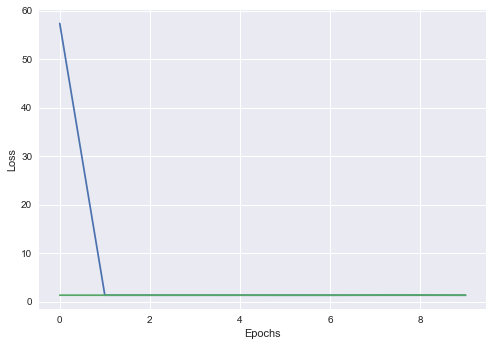

Epoch 1/10


c:\Users\yassi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


85/85 [==============================] - 144s 2s/step - loss: 659064.8125 - accuracy: 0.2806 - val_loss: 4.3190 - val_accuracy: 0.4004
Epoch 2/10
85/85 [==============================] - 151s 2s/step - loss: 3.1056 - accuracy: 0.2884 - val_loss: 4.6988 - val_accuracy: 0.1590
Epoch 3/10
85/85 [==============================] - 149s 2s/step - loss: 2.9069 - accuracy: 0.2830 - val_loss: 2.0151 - val_accuracy: 0.1590
Epoch 4/10
85/85 [==============================] - 148s 2s/step - loss: 1.8522 - accuracy: 0.3301 - val_loss: 1.3394 - val_accuracy: 0.4004
Epoch 5/10
85/85 [==============================] - 144s 2s/step - loss: 2.0887 - accuracy: 0.3509 - val_loss: 1.4488 - val_accuracy: 0.2147
Epoch 6/10
85/85 [==============================] - 142s 2s/step - loss: 1.7668 - accuracy: 0.3596 - val_loss: 2.7797 - val_accuracy: 0.4004
Epoch 7/10
85/85 [==============================] - 144s 2s/step - loss: 1.8878 - accuracy: 0.3592 - val_loss: 1.3863 - val_accuracy: 0.4004
Epoch 8/10
85/85 [=

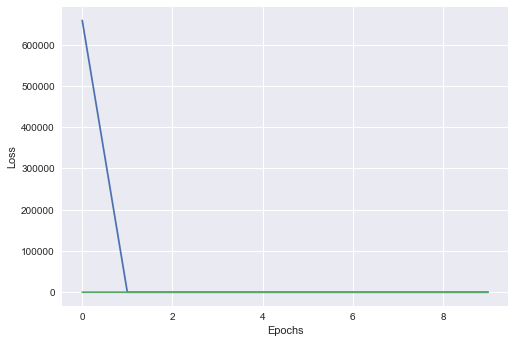

Epoch 1/10


c:\Users\yassi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


85/85 [==============================] - 141s 2s/step - loss: 2.1611 - accuracy: 0.3057 - val_loss: 1.9044 - val_accuracy: 0.2251
Epoch 2/10
85/85 [==============================] - 143s 2s/step - loss: 1.4508 - accuracy: 0.3550 - val_loss: 1.4496 - val_accuracy: 0.2251
Epoch 3/10
85/85 [==============================] - 126s 1s/step - loss: 1.3777 - accuracy: 0.3834 - val_loss: 1.3487 - val_accuracy: 0.4004
Epoch 4/10
85/85 [==============================] - 123s 1s/step - loss: 1.3635 - accuracy: 0.4022 - val_loss: 1.3662 - val_accuracy: 0.2251
Epoch 5/10
85/85 [==============================] - 121s 1s/step - loss: 1.3454 - accuracy: 0.4062 - val_loss: 1.3509 - val_accuracy: 0.4004
Epoch 6/10
85/85 [==============================] - 116s 1s/step - loss: 1.3439 - accuracy: 0.4129 - val_loss: 1.3395 - val_accuracy: 0.4004
Epoch 7/10
85/85 [==============================] - 116s 1s/step - loss: 1.3399 - accuracy: 0.4131 - val_loss: 1.3327 - val_accuracy: 0.4004
Epoch 8/10
85/85 [======

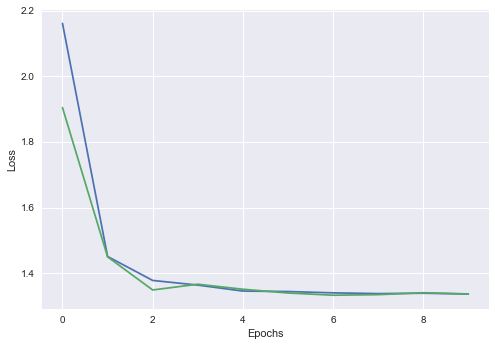

Epoch 1/10


c:\Users\yassi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


337/337 [==============================] - 403s 1s/step - loss: 323511.4375 - accuracy: 0.2903 - val_loss: 1.7186 - val_accuracy: 0.2251
Epoch 2/10
337/337 [==============================] - 439s 1s/step - loss: 2.3185 - accuracy: 0.3321 - val_loss: 6.7460 - val_accuracy: 0.4004
Epoch 3/10
337/337 [==============================] - 442s 1s/step - loss: 2.1895 - accuracy: 0.3477 - val_loss: 1.8954 - val_accuracy: 0.2251
Epoch 4/10
337/337 [==============================] - 438s 1s/step - loss: 2.2119 - accuracy: 0.3377 - val_loss: 1.3977 - val_accuracy: 0.4004
Epoch 5/10
337/337 [==============================] - 441s 1s/step - loss: 2.1448 - accuracy: 0.3421 - val_loss: 1.7656 - val_accuracy: 0.4004
Epoch 6/10
337/337 [==============================] - 445s 1s/step - loss: 2.1351 - accuracy: 0.3312 - val_loss: 1.4029 - val_accuracy: 0.4004
Epoch 7/10
337/337 [==============================] - 442s 1s/step - loss: 2.1281 - accuracy: 0.3453 - val_loss: 1.8273 - val_accuracy: 0.1590
Epoch

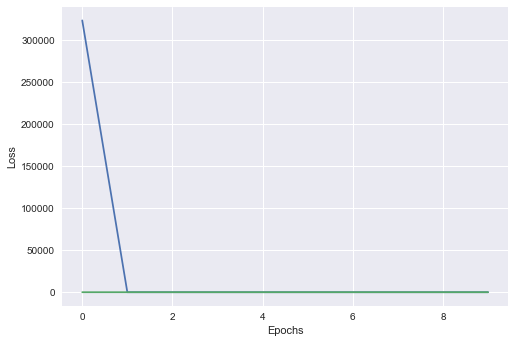

Epoch 1/10


c:\Users\yassi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


337/337 [==============================] - 446s 1s/step - loss: 2.1615 - accuracy: 0.4062 - val_loss: 1.3415 - val_accuracy: 0.4004
Epoch 2/10
337/337 [==============================] - 443s 1s/step - loss: 1.3301 - accuracy: 0.4131 - val_loss: 1.3374 - val_accuracy: 0.4004
Epoch 3/10
337/337 [==============================] - 438s 1s/step - loss: 1.3298 - accuracy: 0.4131 - val_loss: 1.3435 - val_accuracy: 0.4004
Epoch 4/10
337/337 [==============================] - 438s 1s/step - loss: 1.3313 - accuracy: 0.4131 - val_loss: 1.3360 - val_accuracy: 0.4004
Epoch 5/10
337/337 [==============================] - 439s 1s/step - loss: 1.3294 - accuracy: 0.4131 - val_loss: 1.3348 - val_accuracy: 0.4004
Epoch 6/10
337/337 [==============================] - 436s 1s/step - loss: 1.3295 - accuracy: 0.4131 - val_loss: 1.3333 - val_accuracy: 0.4004
Epoch 7/10
337/337 [==============================] - 435s 1s/step - loss: 1.3293 - accuracy: 0.4131 - val_loss: 1.3322 - val_accuracy: 0.4004
Epoch 8/10

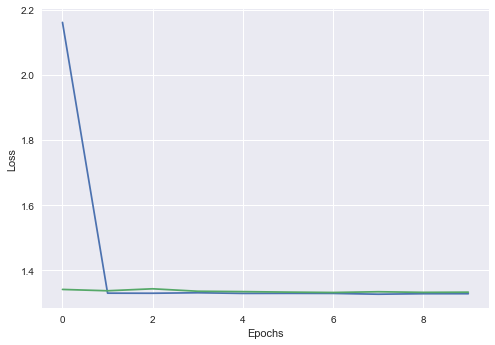

Epoch 1/10


c:\Users\yassi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


169/169 [==============================] - 237s 1s/step - loss: 407869.3750 - accuracy: 0.2866 - val_loss: 7.5363 - val_accuracy: 0.4004
Epoch 2/10
169/169 [==============================] - 236s 1s/step - loss: 2.5535 - accuracy: 0.3144 - val_loss: 5.5333 - val_accuracy: 0.1590
Epoch 3/10
169/169 [==============================] - 236s 1s/step - loss: 1.9530 - accuracy: 0.3377 - val_loss: 2.7773 - val_accuracy: 0.1590
Epoch 4/10
169/169 [==============================] - 235s 1s/step - loss: 1.6784 - accuracy: 0.3538 - val_loss: 10.7353 - val_accuracy: 0.2147
Epoch 5/10
169/169 [==============================] - 241s 1s/step - loss: 1.8436 - accuracy: 0.3667 - val_loss: 1.7066 - val_accuracy: 0.2147
Epoch 6/10
169/169 [==============================] - 235s 1s/step - loss: 1.7464 - accuracy: 0.3700 - val_loss: 1.6420 - val_accuracy: 0.1590
Epoch 7/10
169/169 [==============================] - 235s 1s/step - loss: 1.8772 - accuracy: 0.3605 - val_loss: 1.3675 - val_accuracy: 0.4004
Epoc

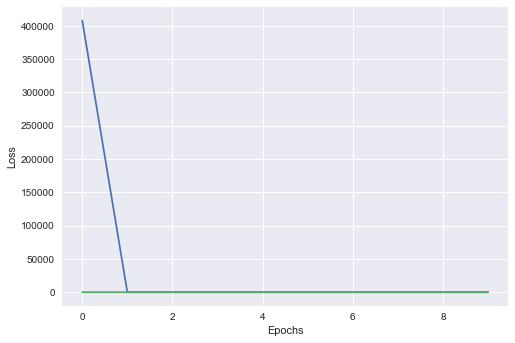

In [63]:
def HParamsTuning(n):
    best_model = None
    best_params = None
    best_acc = 0
    best_hist = 0
    
    for i in range(n):
        random_params = randomize_parameters()
        model = random_neural_network(random_params)
        
        opt = tf.keras.optimizers.RMSprop(lr =random_params[0], decay = random_params[1])
        model.compile(optimizer = opt, loss='categorical_crossentropy', metrics = ['accuracy'])
        
        model_info = model.fit(padded_sequences, train_class, batch_size=random_params[5], epochs=10, validation_split = 0.2, validation_data = (padded_sequences_val, val_class))
        predicted = model.predict(padded_sequences_val)
        acc = accuracy(val_class, predicted)
        figure = plt.figure()
        plt.plot(model_info.history['loss'])
        plt.plot(model_info.history['val_loss'])
        plt.ylabel('Loss')
        plt.xlabel('Epochs')
        plt.show()
        if(acc > best_acc):
            best_acc = acc
            best_model = model
            best_params = random_params
            best_hist = model_info
            
    return best_acc, best_model, best_params, best_hist

best_model = HParamsTuning(6)

In [64]:
print("Best accuracy = " , best_model[0])
print("Best model = " , best_model[1] )
print("Best parameters = " , best_model[2] )


Best accuracy =  0.4217565760142666
Best model =  <keras.engine.sequential.Sequential object at 0x000002151549A070>
Best parameters =  (0.01, 1e-05, 0.2, 200, 4, 16)


Epoch 1/10


c:\Users\yassi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


43/43 [==============================] - 76s 2s/step - loss: 13.3819 - accuracy: 0.3042 - val_loss: 1.4807 - val_accuracy: 0.2251
Epoch 2/10
43/43 [==============================] - 73s 2s/step - loss: 1.4413 - accuracy: 0.4031 - val_loss: 1.6158 - val_accuracy: 0.2251
Epoch 3/10
43/43 [==============================] - 77s 2s/step - loss: 2.1522 - accuracy: 0.3486 - val_loss: 1.7080 - val_accuracy: 0.4004
Epoch 4/10
43/43 [==============================] - 79s 2s/step - loss: 1.7862 - accuracy: 0.3750 - val_loss: 1.4058 - val_accuracy: 0.4272
Epoch 5/10
43/43 [==============================] - 78s 2s/step - loss: 1.4568 - accuracy: 0.4077 - val_loss: 1.6072 - val_accuracy: 0.3730
Epoch 6/10
43/43 [==============================] - 75s 2s/step - loss: 1.6097 - accuracy: 0.4282 - val_loss: 1.4245 - val_accuracy: 0.4004
Epoch 7/10
43/43 [==============================] - 75s 2s/step - loss: 1.2871 - accuracy: 0.5282 - val_loss: 1.2281 - val_accuracy: 0.5111
Epoch 8/10
43/43 [============

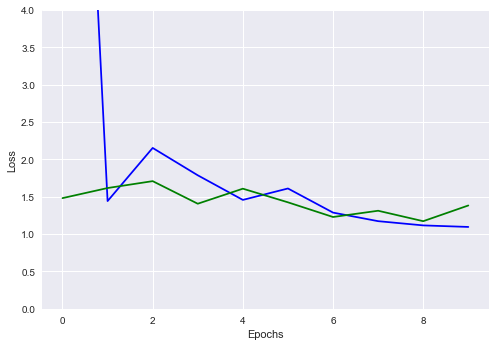

In [66]:
model2 = Sequential()
model2.add(Embedding(25663, 32, input_length= 25663)) 
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100))
model2.add(Dense(10 , activation='softmax'))

opt = tf.keras.optimizers.RMSprop(lr =0.001, decay = 0.00001)
model2.compile(optimizer = opt, loss='categorical_crossentropy', metrics = ['accuracy'])

model_info2 = model2.fit(padded_sequences, train_class, batch_size=128, epochs=10, validation_split = 0.2, validation_data = (padded_sequences_val, val_class))
predicted2 = model2.predict(padded_sequences_val)
acc2 = accuracy(val_class, predicted2)
figure = plt.figure()
plt.ylim(0, 4)
plt.plot(model_info2.history['loss'], 'b-')
plt.plot(model_info2.history['val_loss'], 'g-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()


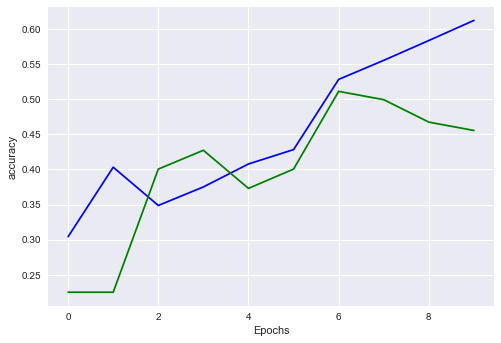

0.5020062416406599


In [69]:
figure = plt.figure()
plt.plot(model_info2.history['accuracy'], 'b-')
plt.plot(model_info2.history['val_accuracy'], 'g-')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.show()
print(acc2)

Epoch 1/50


c:\Users\yassi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


43/43 [==============================] - 76s 2s/step - loss: 10.1407 - accuracy: 0.3068 - val_loss: 1.3613 - val_accuracy: 0.4004
Epoch 2/50
43/43 [==============================] - 82s 2s/step - loss: 1.3692 - accuracy: 0.3968 - val_loss: 1.6322 - val_accuracy: 0.2251
Epoch 3/50
43/43 [==============================] - 79s 2s/step - loss: 2.0994 - accuracy: 0.3081 - val_loss: 1.7721 - val_accuracy: 0.4004
Epoch 4/50
43/43 [==============================] - 73s 2s/step - loss: 1.4567 - accuracy: 0.3743 - val_loss: 1.3359 - val_accuracy: 0.4004
Epoch 5/50
43/43 [==============================] - 79s 2s/step - loss: 1.4184 - accuracy: 0.4204 - val_loss: 1.3590 - val_accuracy: 0.4465
Epoch 6/50
43/43 [==============================] - 82s 2s/step - loss: 1.4422 - accuracy: 0.4583 - val_loss: 1.3037 - val_accuracy: 0.3752
Epoch 7/50
43/43 [==============================] - 75s 2s/step - loss: 1.2676 - accuracy: 0.5185 - val_loss: 1.1855 - val_accuracy: 0.5104
Epoch 8/50
43/43 [============

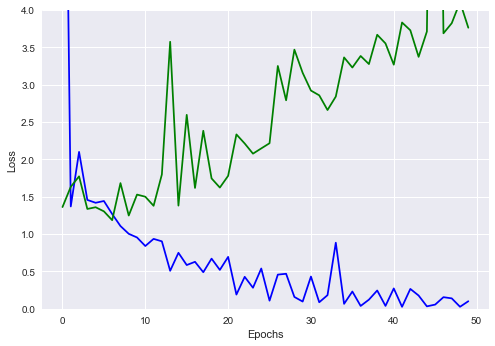

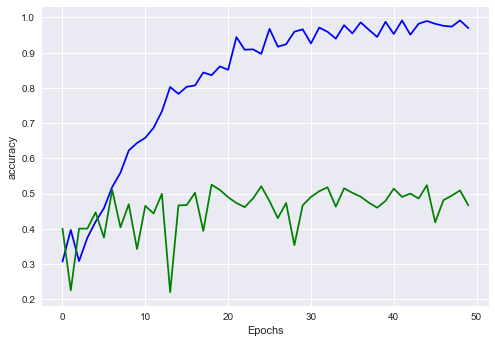

0.5020062416406599


In [71]:
model3 = Sequential()
model3.add(Embedding(25663, 32, input_length= 25663)) 
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(100))
model3.add(Dense(10 , activation='softmax'))

opt = tf.keras.optimizers.RMSprop(lr =0.001, decay = 0.00001)
model3.compile(optimizer = opt, loss='categorical_crossentropy', metrics = ['accuracy'])

model_info3 = model3.fit(padded_sequences, train_class, batch_size=128, epochs=50, validation_split = 0.2, validation_data = (padded_sequences_val, val_class))
predicted3 = model3.predict(padded_sequences_val)
acc3 = accuracy(val_class, predicted3)
figure = plt.figure()
plt.ylim(0, 4)
plt.plot(model_info3.history['loss'], 'b-')
plt.plot(model_info3.history['val_loss'], 'g-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

figure2 = plt.figure()
plt.plot(model_info3.history['accuracy'], 'b-')
plt.plot(model_info3.history['val_accuracy'], 'g-')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.show()
print(acc3)


In [77]:
acc3 = accuracy(val_class, predicted3)
print(acc3)

0.5309852875613018


In [82]:
predicted4 = model3.predict(padded_sequences_test)
acc4 = accuracy(test_class, predicted4)
print(acc4)

0.5062444246208743


In [47]:
model4 = Sequential()
model4.add(Embedding(28300, 64, input_length= 28300)) 
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(100))
model4.add(Dense(10 , activation='softmax'))

opt = tf.keras.optimizers.RMSprop(lr =0.001, decay = 0.00001)
model4.compile(optimizer = opt, loss='categorical_crossentropy', metrics = ['accuracy'])

model_info4 = model4.fit(padded_sequences_train_nn, train_class_nn, batch_size=128, epochs=100)
predicted5 = model4.predict(padded_sequences_test_nn)
acc5 = accuracy(test_class_nn, predicted5)
print(acc5)
figure = plt.figure()
plt.ylim(0, 4)
plt.plot(model_info4.history['loss'], 'b-')
plt.plot(model_info4.history['val_loss'], 'g-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

figure2 = plt.figure()
plt.plot(model_info4.history['accuracy'], 'b-')
plt.plot(model_info4.history['val_accuracy'], 'g-')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.show()

Epoch 1/100
62/62 [==============================] - 270s 4s/step - loss: 22.0247 - accuracy: 0.3262
Epoch 2/100
62/62 [==============================] - 268s 4s/step - loss: 1.9140 - accuracy: 0.4102
Epoch 3/100
62/62 [==============================] - 273s 4s/step - loss: 1.5170 - accuracy: 0.4102
Epoch 4/100
62/62 [==============================] - 262s 4s/step - loss: 1.3640 - accuracy: 0.4102
Epoch 5/100
62/62 [==============================] - 263s 4s/step - loss: 1.3372 - accuracy: 0.4102
Epoch 6/100
62/62 [==============================] - 272s 4s/step - loss: 1.3322 - accuracy: 0.4102
Epoch 7/100
32/62 [==============>...............] - ETA: 2:10 - loss: 1.3312 - accuracy: 0.4092

KeyboardInterrupt: 